# Regularizacion en regresion polinomica
La ecuacion clave

$$J(\theta) = \frac12 \| X \theta - y \|^2 + \lambda \| \theta \|^2  \quad , \quad \lambda >  0$$

Regularizando ganamos en los siguientes puntos.

* Si el sistema no es invertible, la regularizacion garantiza solucion.
* La regularizacion hace que el sistema se mas estable. Si hay valores singulares muy pequenhos, el $\lambda$ los "empuja" hacia arriba. Emputa el espectro al lado positivo. De forma que $X + \sqrt{\lambda} I$ es positiva definida y hace el sistema, no solo converja sino que lo hace mas rapido.

* Evita el "overfitting" (sobreajuste).

Veamos un ejemplo.

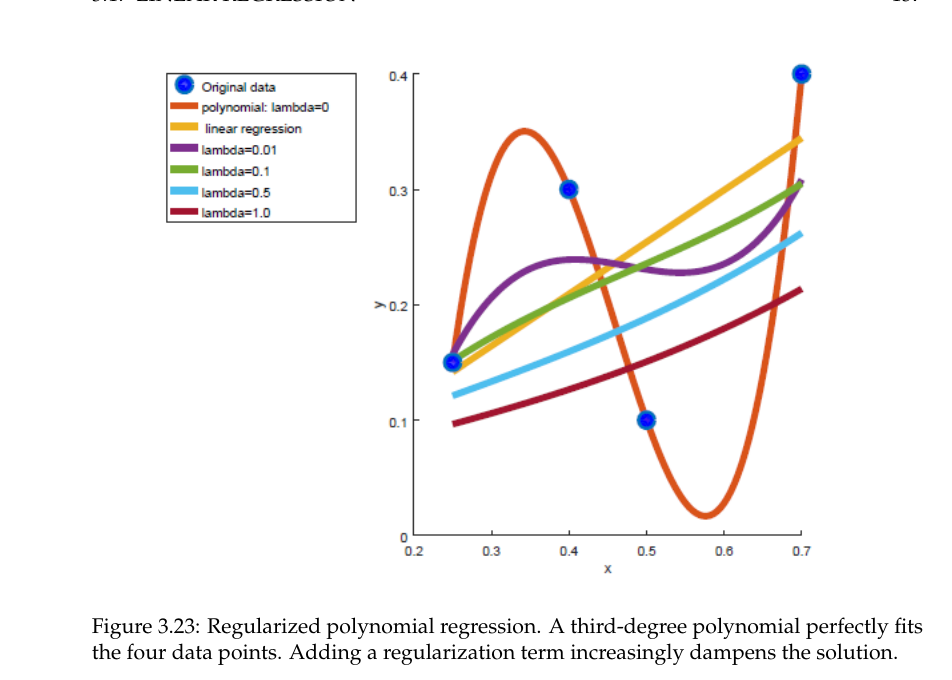

* El caso mas simple es el una linea recta (en amarillo), pero este es un ejemplo de "underfitting" (no es preciso)

* El caso de regresion polinomica de orden $3$, con $\lambda=0$ muestra una curva que se acomoda a los puntos perfectamente. Aca tenemos "overfitting"  (color marron).

* El caso de regresion polinomica de orden $3$, con $\lambda=0.01$. Se muestran las oscilaciones sugeridas por los puntos pero es mas suave. Es, en este ejemplo, tal vez el mejor de los casos donde no hay much "overfitting" ni "underfitting"

* Para $\lambda=0.1$ la curva pierde casi toda su curvatura. Sufre de "underfitting".

* $\lambda=0.5, 1.0$ en este caso no solo la curva pierde curvatura sino que se aproxima hacia el eje $x$ (la funcion 0$.
Esto no es bueno.


La clave de la regularizacion esta en elegir $\lambda$.


## Una nota sobre regresion lineal en general.

Podemos pensar (y esto lo vimos en la clase anterior) en una hipotesis como


$$h(\theta, x) = \theta_0 + \theta_1 \sqrt{x} .$$

Podemos generalizar aun mas


$$h(\theta_0, \theta_1, \theta_2, x_1, x_2) = \theta_0 + \theta_1 \sqrt{x_1} + \theta_2 \exp(x_2)  .$$

Y asi, para cualquier funcion analitica, como por ejemplo, $\sin x$, $\tan x$, $\sinh x$, \log x$, etc y generalizable a cualquier numero de dimensiones.

Ojo: Los $\theta$ deben ser lineales, no pueden estar elevados a ninguna potencia ni dentro de funciones trignometricas, logaritmicas, exponenciales, etc.

Si, por ejemplo

$$h(\theta, x) = \sqrt{ \theta_0} + \theta_1 x .$$

En este caso toca modificar el problema, para hacerlo lineal en $\theta$.


Ejemplo, la proxima tarea que ustedes van a entregar.



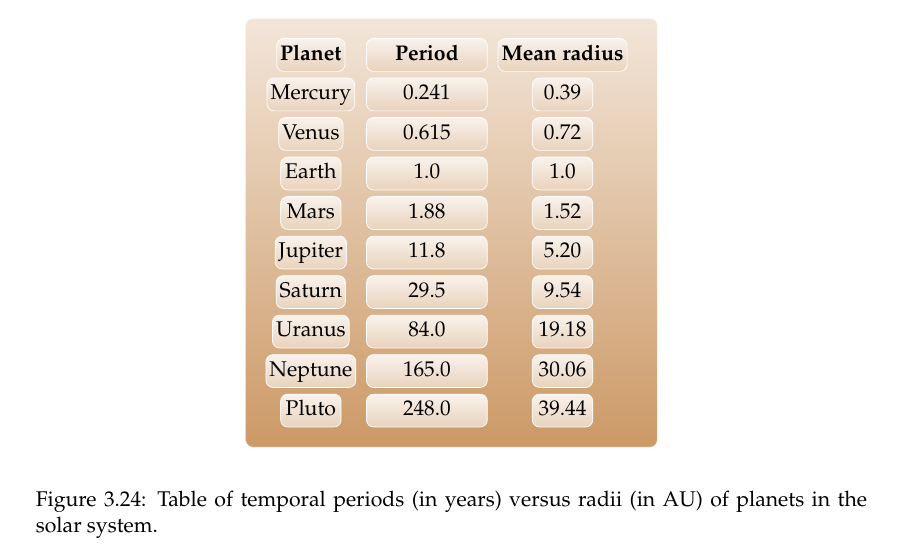

Kepler predijo que el periodo de translacion de cada planeta al rededor del sol esta dado por la ecuacion.

$$ T(r, \theta_1) = \alpha r^{\theta_1} .$$
Los parametros con $\alpha=\theta_0$, y $\theta_1$.

La tarea para ustedes es hacer regresion lineal en este problema, obtener $\alpha,\theta$, y graficar.


Deben encontrar un "truco" para que esta hipotesis sea lineal en $\alpha, \theta$.

## k-fold cross-validation (validacion cruzada de multiplicidad k)

En la clase anterior hablamos del concepto de "overfitting" , el cual no es bueno. Lo debemos evitar. Hay varias tecnicas para detectar, diagnositicar el "overfitting". Por ejemplo.

* Separar los datos en dos grupos. Por ejemplo $70 \%$ para
entrenamiento y $30 \%$ para prueba.

* Separar los datos en tres grupos, por decir $60,20,20 \%$.
El primero grupo $60 \%$, para **entrenar**, el segundo $20 \%$ para hacerle "tunning" (refinar el modelo), el tercero $20 \%$ para probar.

* Existe un metodo mas sofisticado llamado k-fold cross-validation. Se parte el conjunto de datos en $k$ subconjuntos, cada uno con el mismo numero de elementos.
Se hace el siguiente proceso.

    1. Se entrena con los conjuntos $2,3, \cdots, k$ y se prueba con el conjunto 1.
    2. Se entrena con los conjuntos $1,3, \cdots, k$ y se prueba con el conjunto 2.

    $\vdots$

    k. Se entrena con los conjuntos $1,2, \cdots, k-1$ y se prueba con el conjunto $k$.

 En cada caso se calcula el "performance" (la exactitud) tanto para el entrenamiento como para la prueba. Al final se promedian todos valores de "performance" encontrados.
 Si el promedio de entrenamiento es parecido al de prueba no hay overfitting, de lo contrario existe overfitting


 ### Ventajas del k-fold crossvalidation

 * Se puede usar para diagnosticar "overfitting" (si los valores de los promedios en "training" vs "testing" son muy diferentes).

*  Se puede aplicar a otros metodos (si clasificacion a regresion logistica, SVM, ANN...etc. ya tocaremos estos temas) y
comparar para decir cual metodo de estos puede ser mejor para el problema que tengamos a mano.

Desventajas: Puede ser costoso, si se tiene muchos datos y $k \gg 1$. Si los datos son pocos, $k$ no puede ser muy grando.

Encontrar el valor de $k$ (hiperparametro) es parte de la ciencia.

Todos estos algoritmos ya estan insertados en el software de ML, por ejemplo `sklearn`.













Hay tecnicas mas sofisticadas para x-validation

* Stratified k-validation. Es k-fold-validation pero para datos desbalanceados. Por ejemplo **fraude bancario**.
* Group k-validation, y stratified-group-k-fold-validation

# Clasificacion.
Atras queda el problema de regresion que es "continuo", se asume que los datos se ajustan a un modelo continuo, por ejemplo $\theta_0 + \theta_1 x$.

Ahora pensamos en problema discreto. Veamos varias situaciones en donde se tienen problemas de **clasificacion**.

* Un paciente requiere diagnostico (cancer, diabetes). Las unicas respuestas son "positvo", "negativo".

* Una foto se escanea para detectar los obejetos en la foto. Un gato, un perro, una bola, etc.

* Una aplicacion de correo electronico detecta "spam" emails.
Un email es spam, "si" o "no".

* Fraude bancario.

* El banco predice si usted va a dejar de pagar su prestamos.


Algunos metodos que se usan para clasificacion son.

* Regresion logistica (proximo topico)
* SVM (Support Vector Machines, pronto)
* ANN (Artifical Neural Networks, pronto)
* Decision trees (no here)
* Random forest (no here)
* y otros.....

## Logistic Regression (regresion logistica)
La palabra "logisitca" viene de que queremos resolver un problema binario donde tengamos que encontrar si algo es "FALSO" o "VERDADERO", o "si" o "no", o "1" o "0".

Repasando un poco sobre la regresion lineal, tenemos una hipotesis

$$h(\Theta) = X \Theta = Y .$$

Debemos

$$\min_{\Theta} J(\Theta) = \min_{\Theta} \frac12 \| X \Theta - Y \|^2 .$$

podemos pensar que $h(\Theta)$ corre sobre un continuo, pero en realidad para nosotros $Y$ solo puede tener dos valores que son $1$ o $0$. Estamos hablando de clasificacion **binaria**.


Tenemos que pensar en otro lenguaje. El lenguaje de la **estadistica**. Pensemos en el problema de deteccion de tumores, de deteccion de cancer, por ejemplo los datos pueden ser edad del paciente, tamanho del tumor, densidad del tumor, herencia familiar, etc. Planteamos la siguiente pregunta.


$$p( q_i \quad \text{tenga cancer} | x_i, \Theta) \ge \text{umbral} .$$
el umbral puede ser, por ejemplo $0.5$.

Tenemos los siguientes problemas en este punto.

* $h(\Theta)$ se define sobre un continuo

* $h(\Theta)$ debe producir un valor que sea interpretable.

Volvamos a meter la probabilidad en el asunto.
La unica salida que tiene mi problema es $1$ o $0$.


$$p_{bobita} = p_{bobita}(y=1 | x, \theta_0, \theta_1) = \theta_0 + \theta_1 x .$$
no funciona, por que esto me produce una linea continua entre
$(\infty, \infty)$. Que podemos hacer?

Introducimos en este punto, el concepto de "odds" (chances) Menard 2010 [40]. La idea es dividir los ganancias entre las perdidas. Por ejemplo si gana 2 y pierde 4 el "odds" es $2/5$
Mas concretamente, en vez de hablar de numero de ganancias y perdidas lo ponemos entre probabilidad de ganar sobre la probabilidad de perder. Si la probabilidad de ganar es $p$,
entonces

$$\text{odds} = \frac{p}{1-p} .$$

Hasta aca bien, pero que valores toma odds.  Puede llegar hasta
infinito $p=1$.  No tiene valores negativos, no hay simetria entre positivos y negativos del odds. Tomamos el log.


Consideremos un re-evaluacion de la formula anterior como


$$ \log \frac{p}{1-p} .$$

Esta expresion es:

* 0 cuando $p=1/2$.
* Si $p>1/2$ la exresion es positiva.
* Si $p<1/2$ la exresion es negativa.

Para mostrar mas de la simetria veamos

$$\log \frac{p}{1-p} = \log p - \log(1-p) =- [ \log(1-p) - \log p)] = - \log \frac{1-p}{p} .$$










La expresion de arriba esta en $(-\infty, \infty)$.
podemos ajustar esta expresion a una recta.


$$ \log \frac{p}{1-p} = \theta_0 + \theta_1 x .$$
Encontrar los coeficientes $\theta_0$ y $\theta_1$ se llama **regresion logistica**.



Quisiermos encontrar el valor de $p$.
Sea $y=\theta_0 + \theta_1 x$


\begin{eqnarray}
\log \frac{p}{1-p} &=& y  \\
\frac{p}{1-p} &=& \mathrm{e}^y \\
p &=& (1-p) \mathrm{e}^y \\
p + p \mathrm{e}^y &=& \mathrm{e}^y \\
p(1 + \mathrm{e}^y) &=& \mathrm{e}^y \\
p &=& \frac{\mathrm{e}^y}{1 + \mathrm{e}^y} \\
p &=& \frac{1}{1 + \mathrm{e}^{-y}} \\
p &=& \frac{1}{1 + \mathrm{e}^{-X \theta}}
\end{eqnarray}
donde $X \theta = \theta_0 + \theta_1 x$.

A esta esta ultima expresion se le llama la **logistic sigmoid function**.




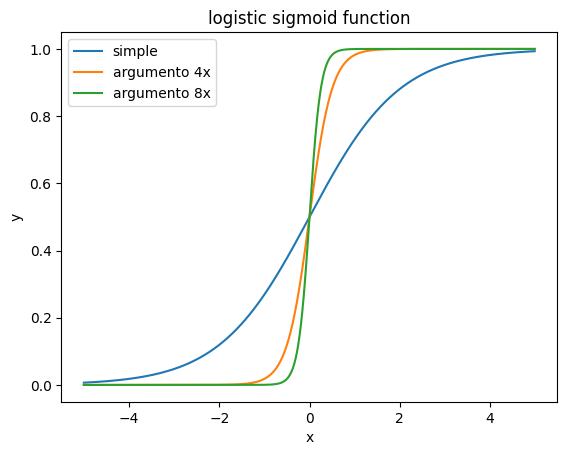

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def S(x):
    return 1/(1 + np.exp(-x))

xdomain = np.arange(-5,5,0.01)

plt.xlabel('x')
plt.ylabel('y')

plt.title("logistic sigmoid function")

plt.plot(xdomain, S(xdomain), label="simple")
plt.plot(xdomain, S(4*xdomain), label="argumento 4x")
plt.plot(xdomain, S(8*xdomain), label="argumento 8x")
plt.legend()
plt.show()



## Proxima clase.

* discusion sobre la logistic sigmoid function
* Funcion objetivo $J(\theta)$ del problema de regresion logistica.
* Gradiente de la Funcion objetivo $J(\theta)$ del problema de regresion logistica.